In [1]:
using MAT, PyPlot, LaTeXStrings, LinearAlgebra, Printf
include("../codes/al_approx.jl")

semilogyseparate! (generic function with 1 method)

In [2]:
z = collect(im*range(0, stop = 2*pi, length = 2001));
#truesol = exp.(z);
#info6, r6 = evalrat(z, "polzer6");
#Try on matrix
include("../codes/MMT.jl")
# Numerical Simulation Parameters
N = 2^11
k = vcat(collect(0:N/2), collect(-N/2+1:-1)) # implies domain length is 2π
kind = vcat(collect(Int(N/2)+2:N), collect(1:Int(N/2)+1))
kindnz = vcat(collect(Int(N/2)+2:N), collect(2:Int(N/2))) # indexing w/o zero mode

# Linear operator (depends on k)
L = -im*abs.(k).^fP.α; L = Diagonal(L);
h = .1/maximum(abs.(L.diag)); 
@printf("Step-size is set to %f, which makes the largest argument be 0.1.\n", h)
trueexpL = exp(h*L);

#Find the rational approximations of degree (i)
r = Array{Any, 1}(undef, 5);
errexpL = Array{Any, 1}(undef, 5)
for i = 4 : 8
    r[i-3] = evalrat(h*L, "../codes/polzer"*string(i))
    errexpL[i-3] = trueexpL - r[i-3]
end

import ColorSchemes.rainbow
J = Int(N/2+1)
display(rainbow) #This is the colorscheme from 0 to 1. 

Step-size is set to 0

.003125, which makes the largest argument be 0.1.


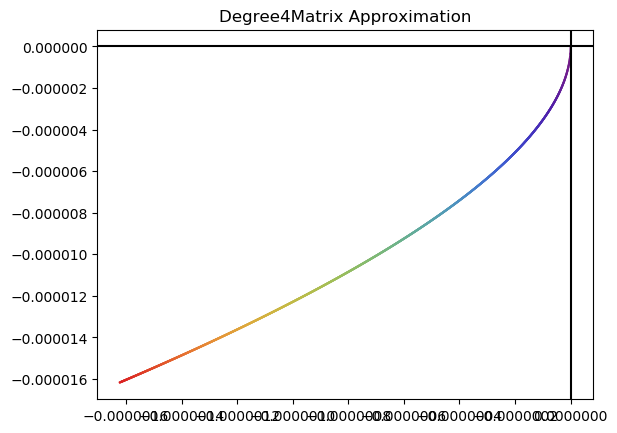

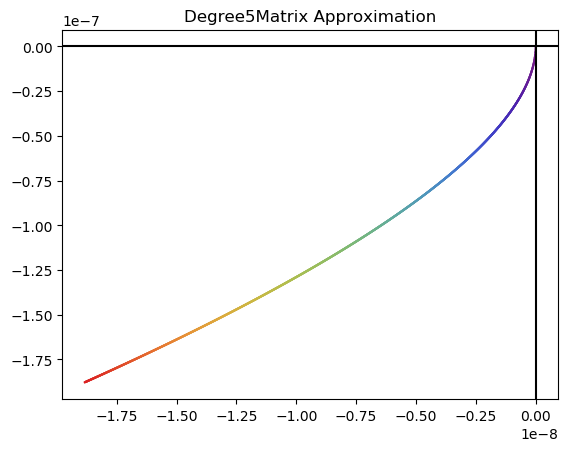

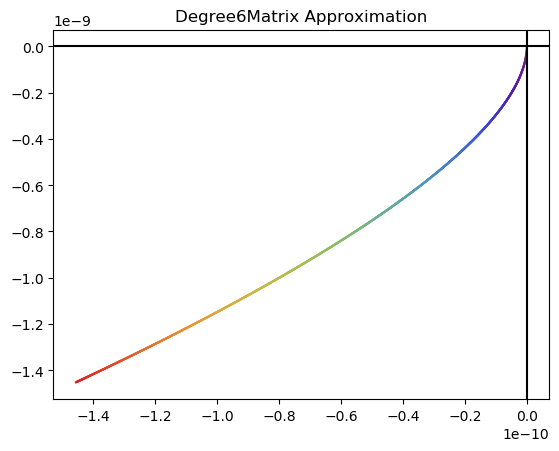

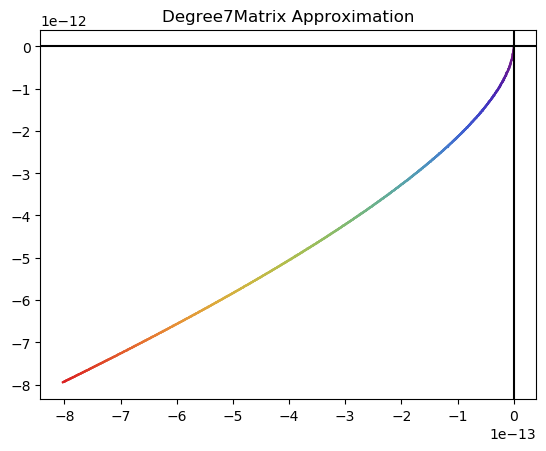

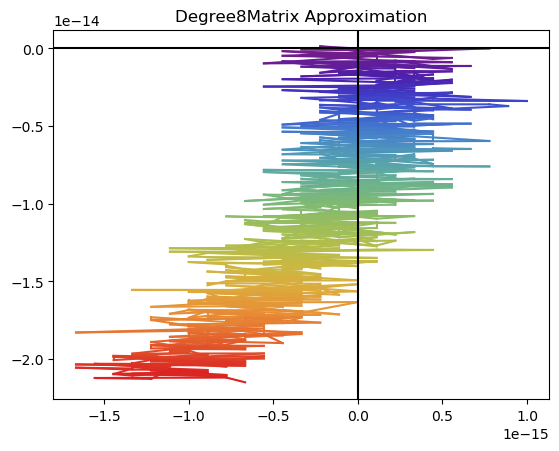

In [3]:
for i = 4 : 8
    plotcomplex!(errexpL[i-3], i)
end

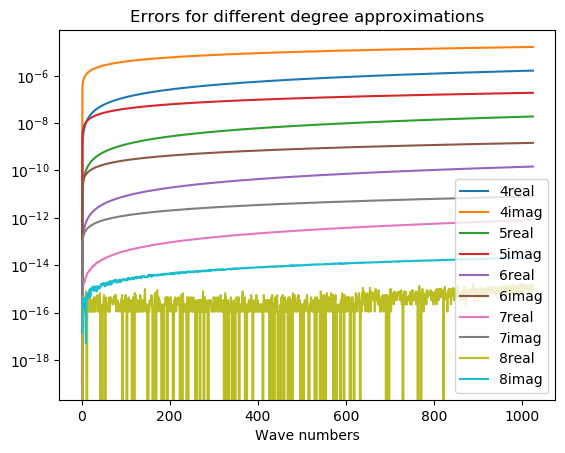

PyObject Text(0.5, 1, 'Errors for different degree approximations')

In [4]:
J = Int(N/2)+1
fig, ax = subplots()
for i = 4 : 8
    semilogyseparate!(errexpL[i-3], i, J)
end
title("Errors for different degree approximations")

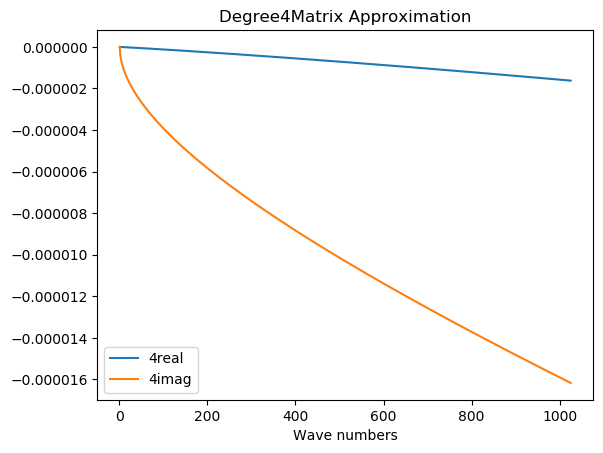

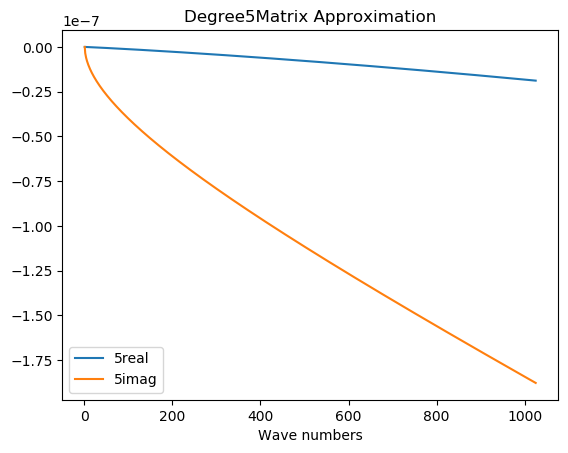

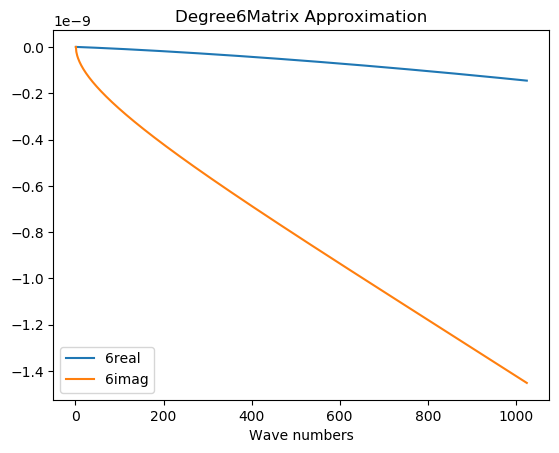

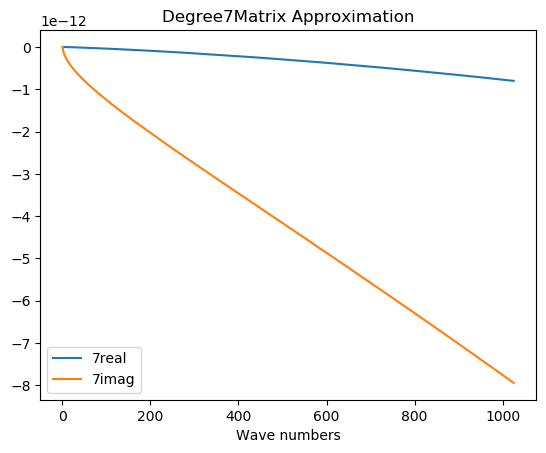

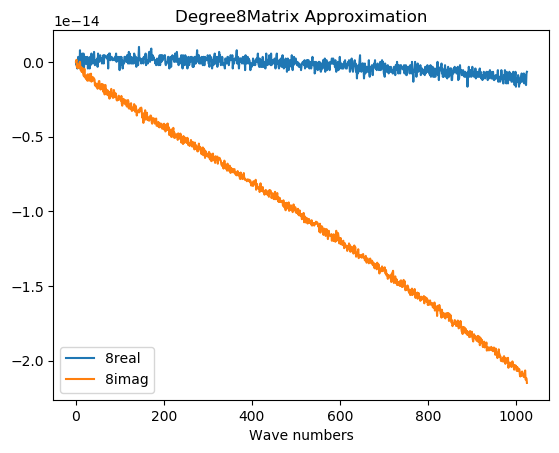

In [5]:
for i = 4 : 8
    plotseparate!(errexpL[i-3], i, J)
end